# General Overview - Data Storytelling and Visualization

After cleaning the original dataset, we can start visualizing our data to identify trends and anomalies. The original dataset comes from [NYC OpenData](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh) and is called the 2015 Street Tree Census - Tree Data.

We compare our column of interest, health, against other columns in order to determine if a tree's health is dependent on its location to the curb (curb_loc) or where its located (borough) and so on. We create these comparisons using histograms, box and whisker plots, pie charts, and mapping locations using longitude and latitude. The purpose of these visualizations is to find trends in the data by comparing two quantities and present the findings with a compelling narrative.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [2]:
data = pd.read_csv('tree_census_cleaned.csv', index_col=0) # import data
tree = data.copy() # save a copy of data as tree

In [3]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651535 entries, 0 to 683787
Data columns (total 21 columns):
tree_id       651535 non-null int64
tree_dbh      651535 non-null int64
curb_loc      651535 non-null object
health        651535 non-null object
spc_common    651535 non-null object
steward       651535 non-null object
guards        651535 non-null object
sidewalk      651535 non-null object
problems      651535 non-null object
root_stone    651535 non-null object
root_grate    651535 non-null object
root_other    651535 non-null object
trunk_wire    651535 non-null object
trnk_light    651535 non-null object
trnk_other    651535 non-null object
brch_light    651535 non-null object
brch_shoe     651535 non-null object
brch_other    651535 non-null object
borough       651535 non-null object
longitude     651535 non-null float64
latitude      651535 non-null float64
dtypes: float64(2), int64(2), object(17)
memory usage: 109.4+ MB


In [4]:
tree = tree.reset_index(drop=True)

In [5]:
tree

tree_id  tree_dbh curb_loc health           spc_common steward guards  \
0        180683         3   OnCurb   Fair            red maple    None   None   
1        200540        21   OnCurb   Fair              pin oak    None   None   
2        204026         3   OnCurb   Good          honeylocust    1or2   None   
3        204337        10   OnCurb   Good          honeylocust    None   None   
4        189565        21   OnCurb   Good      American linden    None   None   
...         ...       ...      ...    ...                  ...     ...    ...   
651530   155433        25   OnCurb   Good              pin oak    None   None   
651531   183795         7   OnCurb   Good  Kentucky yellowwood    1or2   None   
651532   166161        12   OnCurb   Good            red maple    None   None   
651533   184028         9   OnCurb   Good            red maple    None   None   
651534   200607        23   OnCurb   Fair            red maple    None   None   

        sidewalk problems root_stone  ... root_other trunk_wire trnk_light  \
0       NoDamage     None         No  ...         No         No         No   
1         Damage   Stones        Yes  ...         No         No         No   
2         Damage     None         No  ...         No         No         No   
3         Damage   Stones        Yes  ...         No         No         No   
4         Damage   Stones        Yes  ...         No         No         No   
...          ...      ...        ...  ...        ...        ...        ...   
651530    Damage     None         No  ...         No         No         No   
651531  NoDamage     None         No  ...         No         No         No   
651532    Damage     None         No  ...         No         No         No   
651533  NoDamage     None         No  ...         No         No         No   
651534  NoDamage     None         No  ...         No         No         No   

       trnk_other brch_light brch_shoe brch_other        borough  longitude  \
0              No         No        No         No         Queens -73.844215   
1              No         No        No         No         Queens -73.818679   
2              No         No        No         No       Brooklyn -73.936608   
3              No         No        No         No       Brooklyn -73.934456   
4              No         No        No         No       Brooklyn -73.975979   
...           ...        ...       ...        ...            ...        ...   
651530         No         No        No         No       Brooklyn -73.954944   
651531         No         No        No         No         Queens -73.856650   
651532         No         No        No         No  Staten Island -74.136517   
651533         No         No        No         No          Bronx -73.903115   
651534         No         No        No         No         Queens -73.787526   

         latitude  
0       40.723092  
1       40.794111  
2       40.717581  
3       40.713537  
4       40.666778  
...           ...  
651530  40.713211  
651531  40.715194  
651532  40.620762  
651533  40.850828  
651534  40.732165  

[651535 rows x 21 columns]

More information on what each column name stands for:

<table>
<tr>
<th>Column Name</th>
<th>Description</th>
<th>Data Type</th>
</tr>

<tr>
<td>tree_id</td>
<td>Unique identification number for each tree point.</td>
<td>Number</td>
</tr>

<tr>
<td>tree_dbh</td>	
<td>Diameter of the tree, measured at approximately 54" / 137cm above the ground. Data was collected for both living and dead trees; for stumps, use stump_diam</td>
<td>Number</td>
</tr>

<tr>
<td>curb_loc</td>
<td>Location of tree bed in relationship to the curb; trees are either along the curb (OnCurb) or offset from the curb (OffsetFromCurb)</td>
<td>Plain Text</td>
</tr>

<tr>
<td>health</td>
<td>Indicates the user's perception of tree health.</td>
<td>Plain Text</td>
</tr>

<tr>
<td>spc_common</td>
<td>Common name for species, e.g. "red maple"</td>
<td>Plain Text</td>
</tr>

<tr>
<td>steward</td>
<td>Indicates the number of unique signs of stewardship observed for this tree. Not recorded for stumps or dead trees.</td>
<td>Plain Text</td>
</tr>

<tr>
<td>guards</td>
<td>Indicates whether a guard is present, and if the user felt it was a helpful or harmful guard. Not recorded for dead trees and stumps.</td>
<td>Plain Text</td>
</tr>

<tr>
<td>sidewalk</td>
<td>Indicates whether one of the sidewalk flags immediately adjacent to the tree was damaged, cracked, or lifted. Not recorded for dead trees and stumps.</td>
<td>Plain Text</td>
</tr>

<tr>
<td>problems</td>
<td></td>
<td>Plain Text</td>
</tr>

<tr>
<td>root_stone</td>
<td>Indicates the presence of a root problem caused by paving stones in tree bed</td>
<td>Plain Text</td>
</tr>

<tr>
<td>root_grate</td>
<td>Indicates the presence of a root problem caused by metal grates in tree bed</td>
<td>Plain Text</td>
</tr>

<tr>
<td>root_other</td>
<td>Indicates the presence of other root problems</td>
<td>Plain Text</td>
</tr>

<tr>
<td>trunk_wire</td>
<td>Indicates the presence of a trunk problem caused by wires or rope wrapped around the trunk</td>
<td>Plain Text</td>
</tr>

<tr>
<td>trnk_light</td>
<td>Indicates the presence of a trunk problem caused by lighting installed on the tree</td>
<td>Plain Text</td>
</tr>

<tr>
<td>trnk_other</td>
<td>Indicates the presence of other trunk problems</td>
<td>Plain Text</td>
</tr>

<tr>
<td>brch_light</td>
<td>Indicates the presence of a branch problem caused by lights (usually string lights) or wires in the branches</td>
<td>Plain Text</td>
</tr>

<tr>
<td>brch_shoe</td>
<td>Indicates the presence of a branch problem caused by sneakers in the branches</td>
<td>Plain Text</td>
</tr>

<tr>
<td>brch_other</td>
<td>Indicates the presence of other branch problems</td>
<td>Plain Text</td>
</tr>

<tr>
<td>borough</td>
<td>Name of borough in which tree point is located</td>
<td>Plain Text</td>
</tr>

<tr>
<td>latitude</td>
<td>Latitude of point, in decimal degrees</td>
<td>Number</td>
</tr>

<tr>
<td>longitude</td>
<td>Longitude of point, in decimal degrees</td>
<td>Number</td>
</tr>
</table>

In [6]:
tree_health = tree.health.value_counts().reset_index() # taking a look at the overall tree health
tree_health.columns = ['Health', 'Trees']
tree_health

Health   Trees
0   Good  528327
1   Fair   96427
2   Poor   26781

In [7]:
round(tree.health.value_counts(normalize=True), 4) * 100

# percentage of trees based on health

Good    81.09
Fair    14.80
Poor     4.11
Name: health, dtype: float64

Trees in NYC are mostly in good condition: 81.1% are in good condition, 14.8% are in fair condition, and only 4.11% are in poor condition.

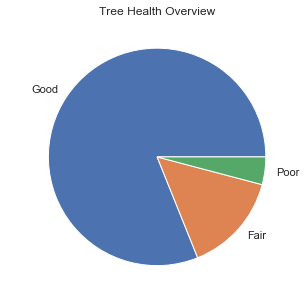

In [8]:
tree.health.value_counts(normalize=True).index = ['Good', 'Fair', 'Poor']
tree.health.value_counts(normalize=True).plot.pie(y='Percentage', figsize=(5, 5), legend=False).set_ylabel(' ')
plt.title('Tree Health Overview')
plt.show()

## Trees by Borough

In [9]:
tree_borough = tree.borough.value_counts().reset_index() # number of trees in each borough
tree_borough.columns = ['Borough', 'Trees']
tree_borough

Borough   Trees
0         Queens  237702
1       Brooklyn  169633
2  Staten Island  101282
3          Bronx   80517
4      Manhattan   62401

In [10]:
round(tree.borough.value_counts(normalize=True), 4) * 100

# percentage of trees based on borough

Queens           36.48
Brooklyn         26.04
Staten Island    15.55
Bronx            12.36
Manhattan         9.58
Name: borough, dtype: float64

The majority of trees are in Queens (36.48%), followed by Brooklyn (26.04%), Staten Island (15.55%), the Bronx (12.36%), and Manhattan (9.58%).

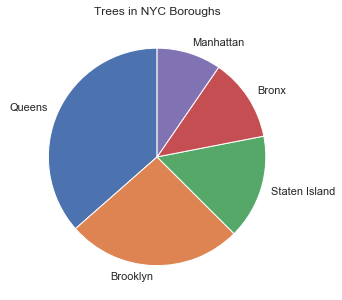

In [11]:
tree.borough.value_counts(normalize=True).index = ['Queens', 'Brooklyn', 'Staten Island', 'Bronx', 'Manhattan']
tree.borough.value_counts(normalize=True).plot.pie(y='Percentage', figsize=(5, 5), startangle=90, legend=False).set_ylabel(' ')
plt.title('Trees in NYC Boroughs')
plt.show()

In [12]:
# tree.groupby('borough')['health'].value_counts()

pd.crosstab(tree.health, [tree.borough])

borough  Bronx  Brooklyn  Manhattan  Queens  Staten Island
health                                                    
Fair     10879     25060      11456   34512          14520
Good     66546    138119      47338  193789          82535
Poor      3092      6454       3607    9401           4227

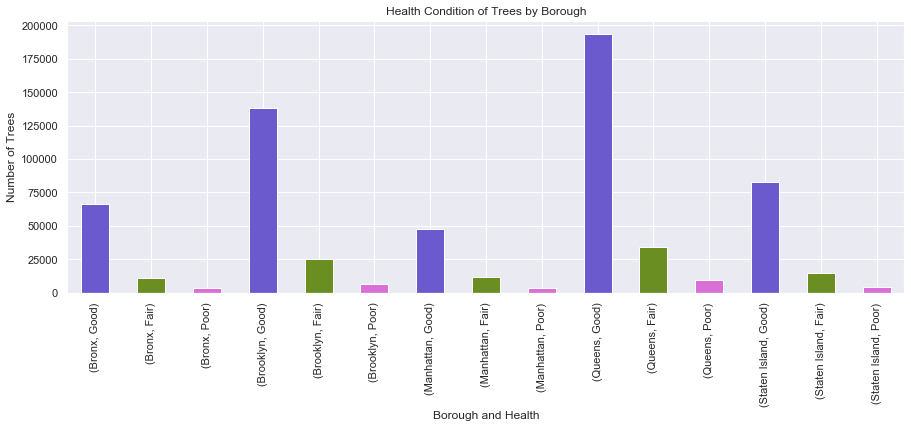

In [13]:
plt.figure(figsize=(15, 5))
tree.groupby('borough')['health'].value_counts().plot(kind='bar', color=['slateblue', 'olivedrab', 'orchid'])
plt.xlabel('Borough and Health')
plt.ylabel('Number of Trees')
plt.title('Health Condition of Trees by Borough')
plt.show()

In [14]:
round(tree.groupby('borough')['health'].value_counts(normalize=True), 4) * 100

# percentage of trees based on health in each borough

borough        health
Bronx          Good      82.65
               Fair      13.51
               Poor       3.84
Brooklyn       Good      81.42
               Fair      14.77
               Poor       3.80
Manhattan      Good      75.86
               Fair      18.36
               Poor       5.78
Queens         Good      81.53
               Fair      14.52
               Poor       3.95
Staten Island  Good      81.49
               Fair      14.34
               Poor       4.17
Name: health, dtype: float64

The Bronx has the highest percentage of good trees (82.65%). Manhattan has the highest percentage of fair (18.36%) and poor (5.78%) trees out of all five boroughs.

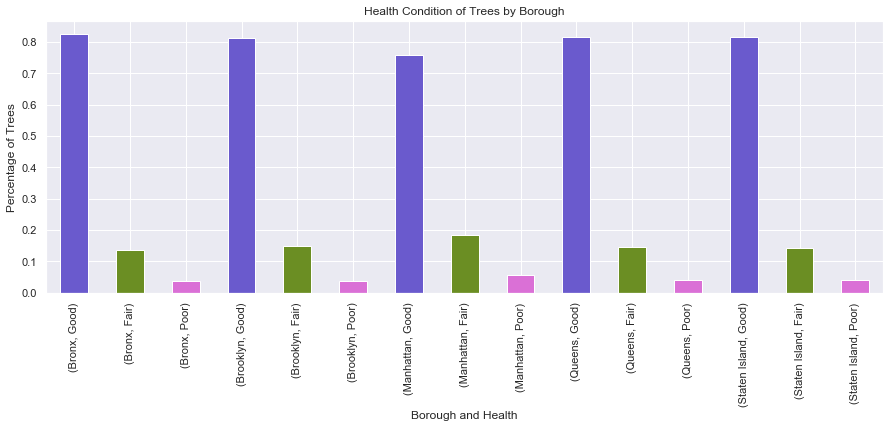

In [15]:
plt.figure(figsize=(15, 5))
tree.groupby('borough')['health'].value_counts(normalize=True).plot(kind='bar', color=['slateblue', 'olivedrab', 'orchid'])
plt.xlabel('Borough and Health')
plt.ylabel('Percentage of Trees')
plt.title('Health Condition of Trees by Borough')
plt.show()

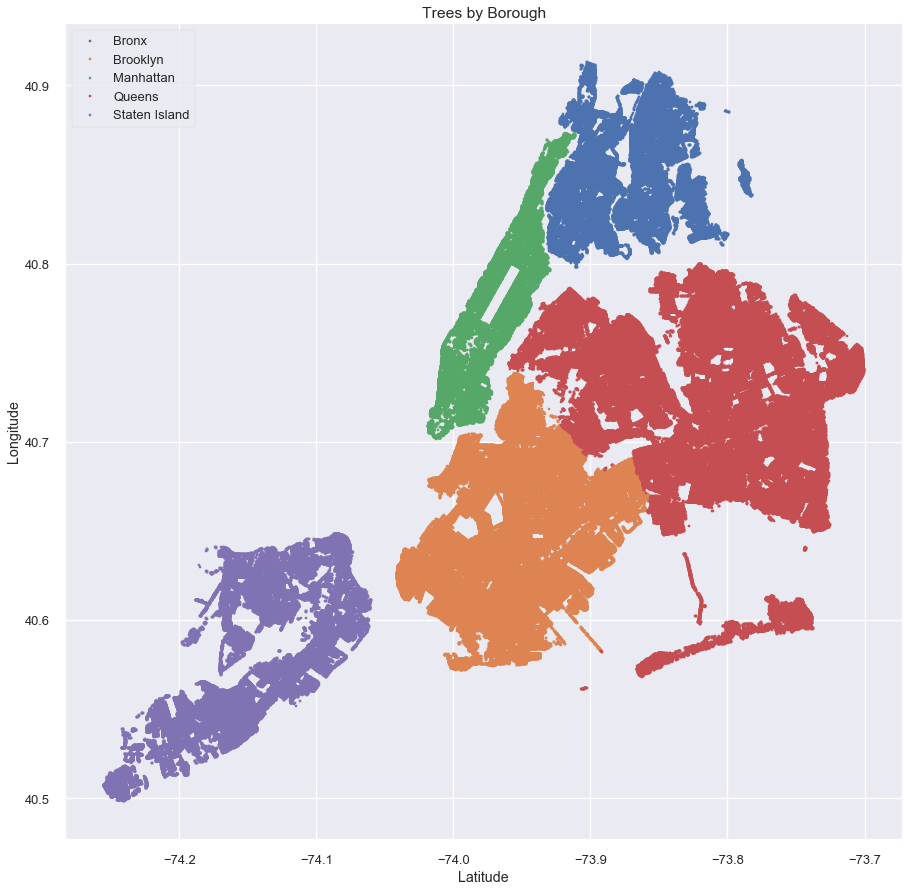

In [16]:
# plotting trees on a map

trees_bronx_scat = tree[tree.borough == 'Bronx']
trees_brooklyn_scat = tree[tree.borough == 'Brooklyn']
trees_manhattan_scat = tree[tree.borough == 'Manhattan']
trees_queens_scat = tree[tree.borough == 'Queens']
trees_staten_scat = tree[tree.borough == 'Staten Island']

plt.style.use('seaborn-talk')
plt.figure(figsize=(15, 15))
plt.scatter(trees_bronx_scat.longitude, trees_bronx_scat.latitude, label='Bronx', marker='s', s=3)
plt.scatter(trees_brooklyn_scat.longitude, trees_brooklyn_scat.latitude, label='Brooklyn', marker='s', s=3)
plt.scatter(trees_manhattan_scat.longitude, trees_manhattan_scat.latitude, label='Manhattan', marker='s', s=3)
plt.scatter(trees_queens_scat.longitude, trees_queens_scat.latitude, label='Queens', marker='s', s=3)
plt.scatter(trees_staten_scat.longitude, trees_staten_scat.latitude, label='Staten Island', marker='s', s=3)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Trees by Borough')
plt.legend(loc='upper left')
plt.show()

Let's take a look at the distribution of trees in each borough. Since the majority of trees are in good health, we are giving them a lighter color to better observe the areas of fair and poor trees.

### Bronx

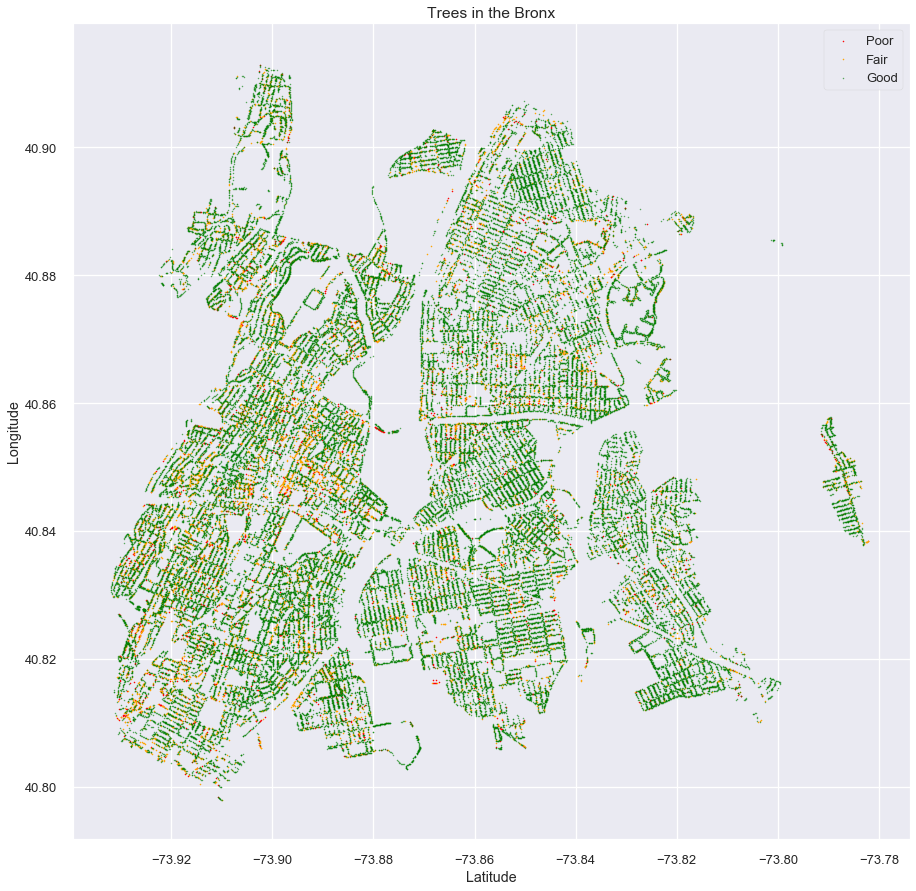

In [17]:
bronx_good = tree[(tree.health == 'Good') & (tree.borough == 'Bronx')][['longitude', 'latitude']]
bronx_fair = tree[(tree.health == 'Fair') & (tree.borough == 'Bronx')][['longitude', 'latitude']]
bronx_poor = tree[(tree.health == 'Poor') & (tree.borough == 'Bronx')][['longitude', 'latitude']]

plt.figure(figsize=(15, 15))
plt.scatter(bronx_poor.longitude, bronx_poor.latitude, c='red', label='Poor', marker='.', s=5)
plt.scatter(bronx_fair.longitude, bronx_fair.latitude, c='orange', label='Fair', marker='.', s=5)
plt.scatter(bronx_good.longitude, bronx_good.latitude, c='green', label='Good', marker='.', s=5, alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Trees in the Bronx')
plt.legend(loc='upper right')
plt.show()

### Brookyln

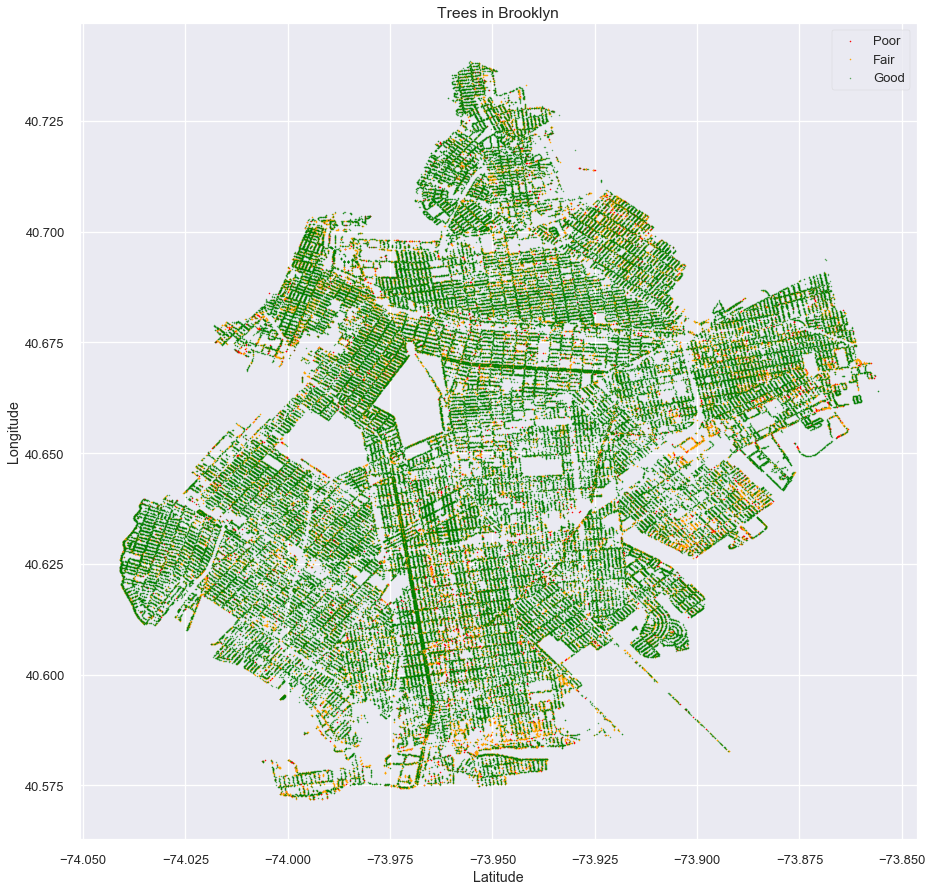

In [18]:
brooklyn_good = tree[(tree.health == 'Good') & (tree.borough == 'Brooklyn')][['longitude', 'latitude']]
brooklyn_fair = tree[(tree.health == 'Fair') & (tree.borough == 'Brooklyn')][['longitude', 'latitude']]
brooklyn_poor = tree[(tree.health == 'Poor') & (tree.borough == 'Brooklyn')][['longitude', 'latitude']]

plt.figure(figsize=(15, 15))
plt.scatter(brooklyn_poor.longitude, brooklyn_poor.latitude, c='red', label='Poor', marker='.', s=5)
plt.scatter(brooklyn_fair.longitude, brooklyn_fair.latitude, c='orange', label='Fair', marker='.', s=5)
plt.scatter(brooklyn_good.longitude, brooklyn_good.latitude, c='green', label='Good', marker='.', s=5, alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Trees in Brooklyn')
plt.legend(loc='upper right')
plt.show()

### Manhattan

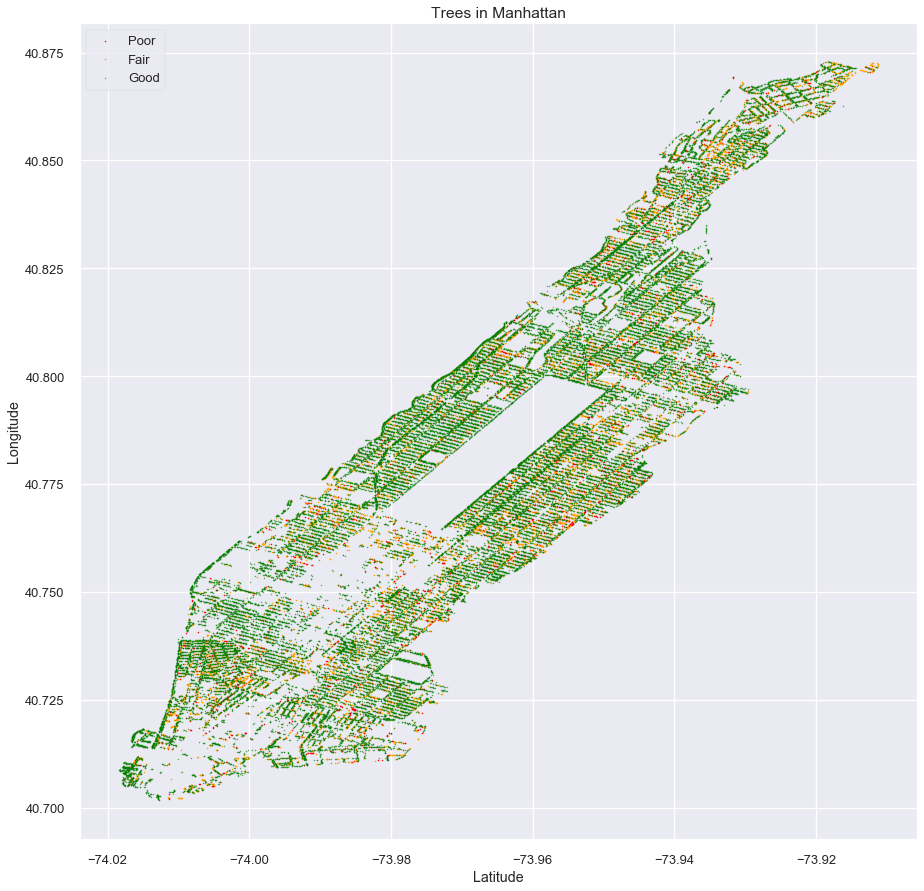

In [19]:
manhattan_good = tree[(tree.health == 'Good') & (tree.borough == 'Manhattan')][['longitude', 'latitude']]
manhattan_fair = tree[(tree.health == 'Fair') & (tree.borough == 'Manhattan')][['longitude', 'latitude']]
manhattan_poor = tree[(tree.health == 'Poor') & (tree.borough == 'Manhattan')][['longitude', 'latitude']]

plt.figure(figsize=(15, 15))
plt.scatter(manhattan_poor.longitude, manhattan_poor.latitude, c='red', label='Poor', marker='.', s=5)
plt.scatter(manhattan_fair.longitude, manhattan_fair.latitude, c='orange', label='Fair', marker='.', s=5)
plt.scatter(manhattan_good.longitude, manhattan_good.latitude, c='green', label='Good', marker='.', s=5, alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Trees in Manhattan')
plt.legend(loc='upper left')
plt.show()

### Queens

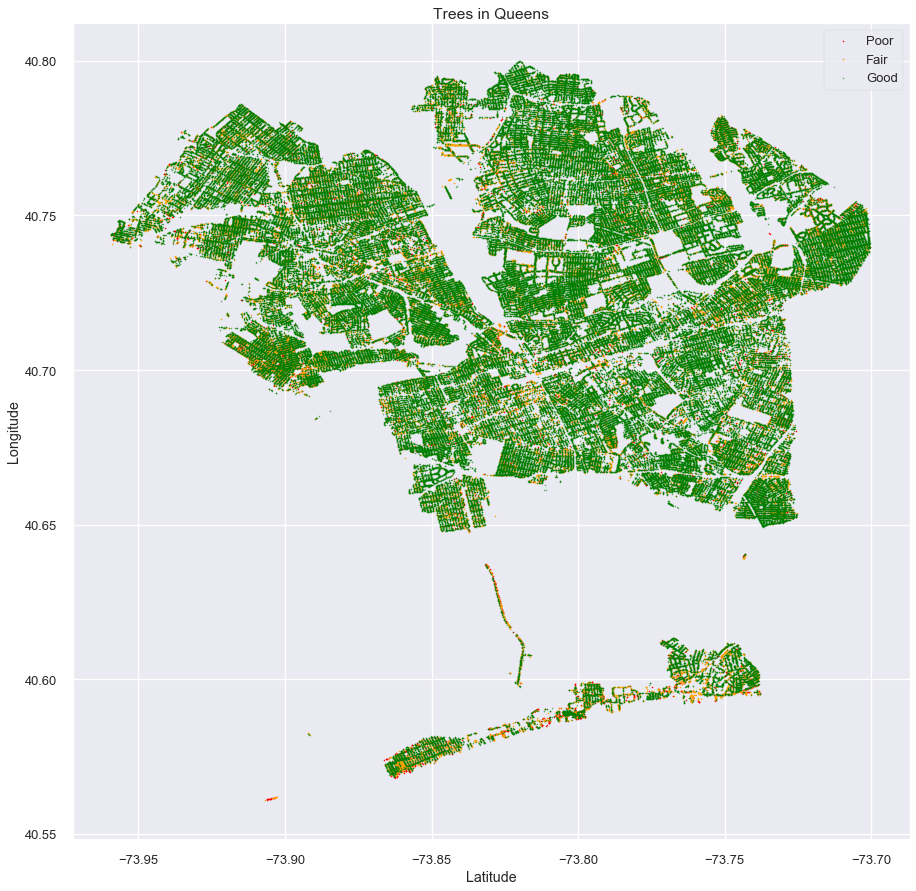

In [20]:
queens_good = tree[(tree.health == 'Good') & (tree.borough == 'Queens')][['longitude', 'latitude']]
queens_fair = tree[(tree.health == 'Fair') & (tree.borough == 'Queens')][['longitude', 'latitude']]
queens_poor = tree[(tree.health == 'Poor') & (tree.borough == 'Queens')][['longitude', 'latitude']]

plt.figure(figsize=(15, 15))
plt.scatter(queens_poor.longitude, queens_poor.latitude, c='red', label='Poor', marker='.', s=5)
plt.scatter(queens_fair.longitude, queens_fair.latitude, c='orange', label='Fair', marker='.', s=5)
plt.scatter(queens_good.longitude, queens_good.latitude, c='green', label='Good', marker='.', s=5, alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Trees in Queens')
plt.legend(loc='upper right')
plt.show()

### Staten Island

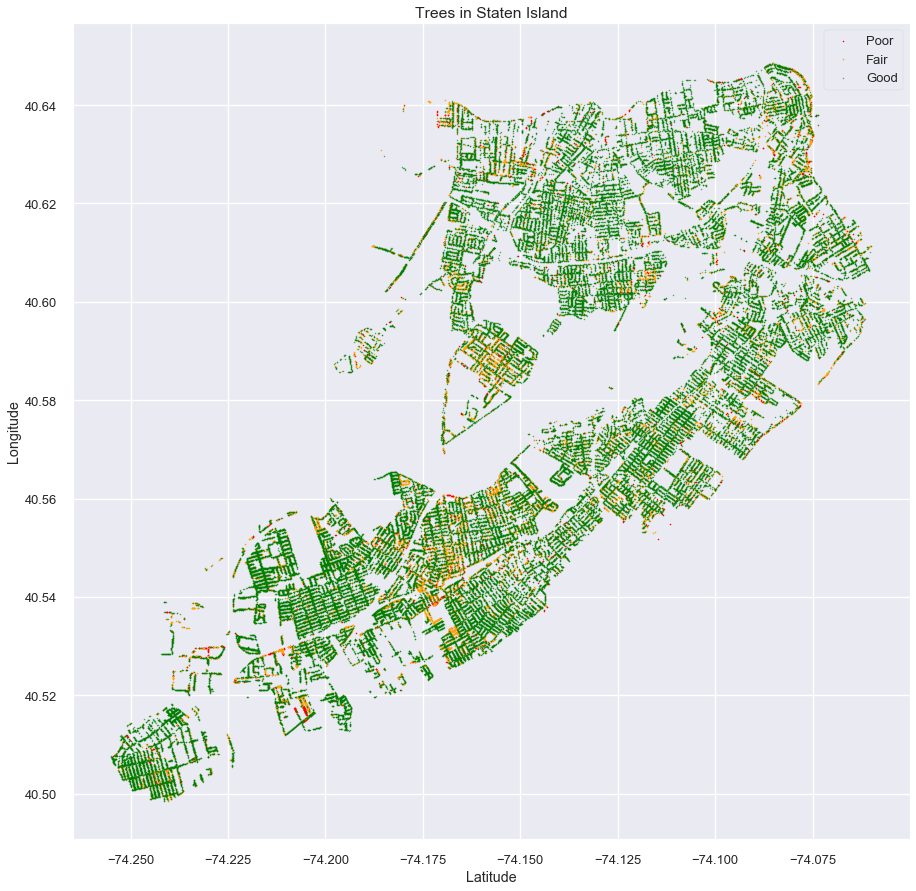

In [21]:
staten_good = tree[(tree.health == 'Good') & (tree.borough == 'Staten Island')][['longitude', 'latitude']]
staten_fair = tree[(tree.health == 'Fair') & (tree.borough == 'Staten Island')][['longitude', 'latitude']]
staten_poor = tree[(tree.health == 'Poor') & (tree.borough == 'Staten Island')][['longitude', 'latitude']]

plt.figure(figsize=(15, 15))
plt.scatter(staten_poor.longitude, staten_poor.latitude, c='red', label='Poor', marker='.', s=5)
plt.scatter(staten_fair.longitude, staten_fair.latitude, c='orange', label='Fair', marker='.', s=5)
plt.scatter(staten_good.longitude, staten_good.latitude, c='green', label='Good', marker='.', s=5, alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Trees in Staten Island')
plt.legend(loc='upper right')
plt.show()

## Stewardships and Tree Health

The Parks & Rec website define 'steward' as 'the number of unique signs of stewardship observed for this tree.'

In [22]:
tree_steward = tree.steward.value_counts().reset_index() # stewards per tree
tree_steward.columns = ['Stewards', 'Trees']
tree_steward

Stewards   Trees
0     None  487366
1     1or2  143390
2     3or4   19170
3  4orMore    1609

In [23]:
round(tree.steward.value_counts(normalize=True), 4) * 100

# percentage of trees based on stewardship

None       74.80
1or2       22.01
3or4        2.94
4orMore     0.25
Name: steward, dtype: float64

The majority of trees (74.8%) do not have a steward while a small fraction, 0.25%, have 4 or more stewards taking care of them.

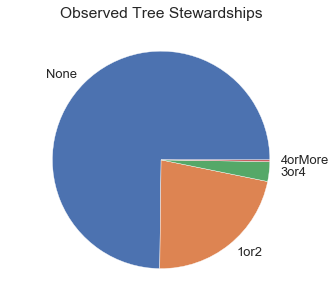

In [24]:
# visualizing stewardship

tree.steward.value_counts(normalize=True).index = ['None', '1 or 2', '3 or 4', '4 or More']
tree.steward.value_counts(normalize=True).plot.pie(y='Percentage', figsize=(5, 5), legend=False).set_ylabel(' ')
plt.title('Observed Tree Stewardships')
plt.show()

In [25]:
# tree.groupby('steward')['health'].value_counts()

pd.crosstab(tree.health, [tree.steward])

steward    1or2   3or4  4orMore    None
health                                 
Fair      21883   2829      200   71515
Good     115231  15594     1360  396142
Poor       6276    747       49   19709

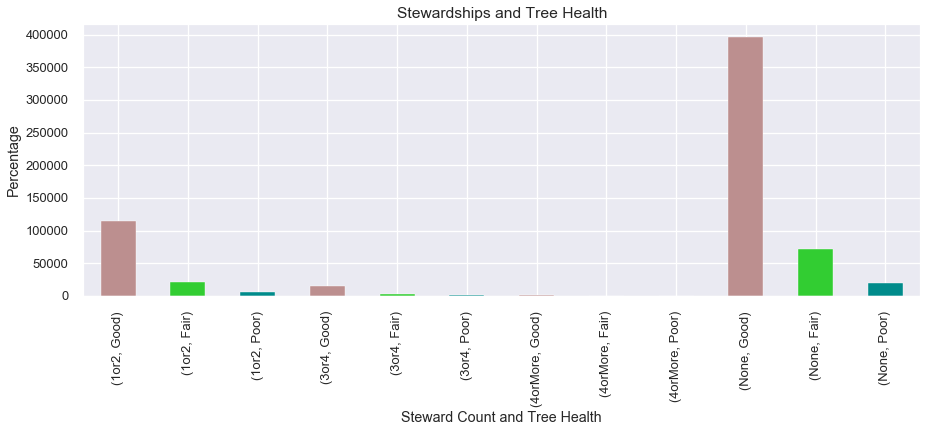

In [26]:
plt.figure(figsize=(15, 5))
tree.groupby('steward')['health'].value_counts().plot(kind='bar', color=['rosybrown', 'limegreen', 'darkcyan'])
plt.xlabel('Steward Count and Tree Health')
plt.ylabel('Percentage')
plt.title('Stewardships and Tree Health')
plt.show()

In [27]:
round(tree.groupby('steward')['health'].value_counts(normalize=True), 4) * 100

# percentage of tree health based on steward type

steward  health
1or2     Good      80.36
         Fair      15.26
         Poor       4.38
3or4     Good      81.35
         Fair      14.76
         Poor       3.90
4orMore  Good      84.52
         Fair      12.43
         Poor       3.05
None     Good      81.28
         Fair      14.67
         Poor       4.04
Name: health, dtype: float64

Of the trees that have stewards, those with 4 or more stewards have the highest percentage of trees in good health (84.52%) and the lowest percentage of trees in poor health (3.04%). However, it is worth nothing that trees with 4 or more stewards make up just 0.25% of the overall population.

Trees without a steward and those with 3 or 4 stewards have similar percentages of good trees, 81.29% and 81.35% respectively. Interestingly, trees with 1 or 2 stewards have the highest number of fair trees (15.26%) and poor trees (4.38%).

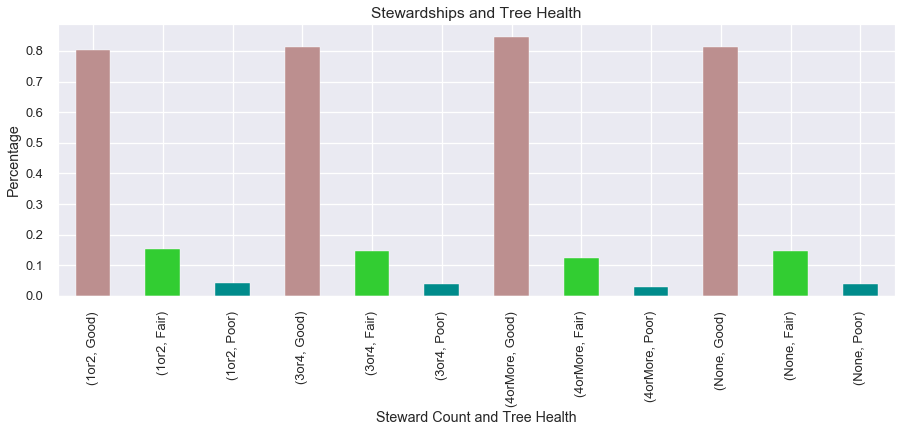

In [28]:
plt.figure(figsize=(15, 5))
tree.groupby('steward')['health'].value_counts(normalize=True).plot(kind='bar', color=['rosybrown', 'limegreen', 'darkcyan'])
plt.xlabel('Steward Count and Tree Health')
plt.ylabel('Percentage')
plt.title('Stewardships and Tree Health')
plt.show()

## Guards and Tree Health

The description for [guards](https://www.nycgovparks.org/trees/tree-care/tree-guards) is: 'whether a guard is present, and if the user felt it was a helpful or harmful guard.'

In [29]:
tree_guards = tree.guards.value_counts().reset_index()
tree_guards.columns = ['Guards', 'Trees']
tree_guards

Guards   Trees
0     None  571729
1  Helpful   51822
2  Harmful   20240
3   Unsure    7744

In [30]:
round(tree.guards.value_counts(normalize=True), 4) * 100

# percentage of trees based on guard quality

None       87.75
Helpful     7.95
Harmful     3.11
Unsure      1.19
Name: guards, dtype: float64

The majority of trees (87.75%) of trees do not have a guard.

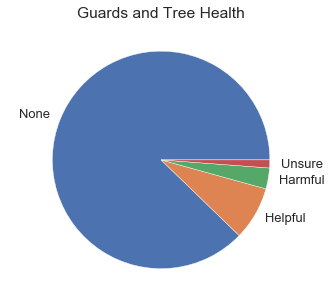

In [31]:
tree.guards.value_counts(normalize=True).index = ['None', 'Helpful', 'Harmful', 'Unsure']
tree.guards.value_counts(normalize=True).plot.pie(y='Percentage', figsize=(5, 5), legend=False).set_ylabel(' ')
plt.title('Guards and Tree Health')
plt.show()

In [32]:
# tree.groupby('guards')['health'].value_counts()

pd.crosstab(tree.health, [tree.guards])

guards  Harmful  Helpful    None  Unsure
health                                  
Fair       3836     7159   84057    1375
Good      15313    42602  464503    5909
Poor       1091     2061   23169     460

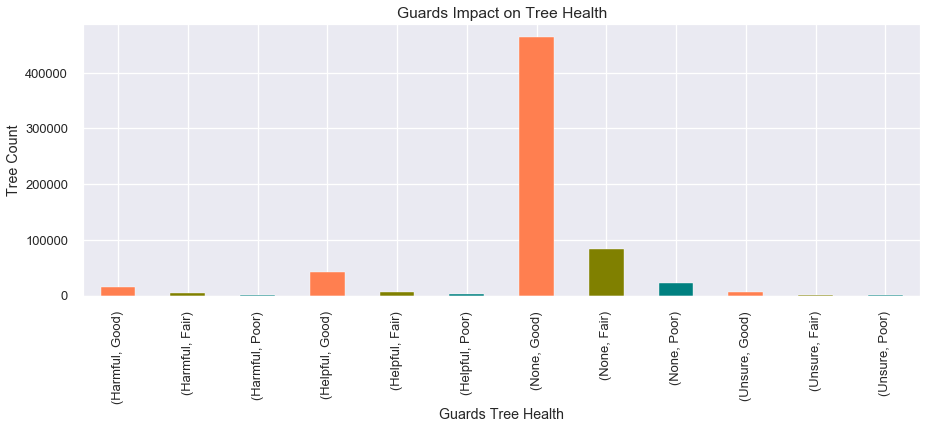

In [33]:
plt.figure(figsize=(15, 5))
tree.groupby('guards')['health'].value_counts().plot(kind='bar', color=['coral', 'olive', 'teal'])
plt.xlabel('Guards Tree Health')
plt.ylabel('Tree Count')
plt.title('Guards Impact on Tree Health')
plt.show()

In [34]:
round(tree.groupby('guards')['health'].value_counts(normalize=True), 4) * 100

# percentage of trees with each guard type

guards   health
Harmful  Good      75.66
         Fair      18.95
         Poor       5.39
Helpful  Good      82.21
         Fair      13.81
         Poor       3.98
None     Good      81.25
         Fair      14.70
         Poor       4.05
Unsure   Good      76.30
         Fair      17.76
         Poor       5.94
Name: health, dtype: float64

Trees with a harmful guard have the lowest number of good trees (75.66%) and the highest number of fair trees (18.95%). Those with unsure guards have the highest number of poor trees (5.94%) while trees with helpful guards have the highest percentage of good trees (82.21%).

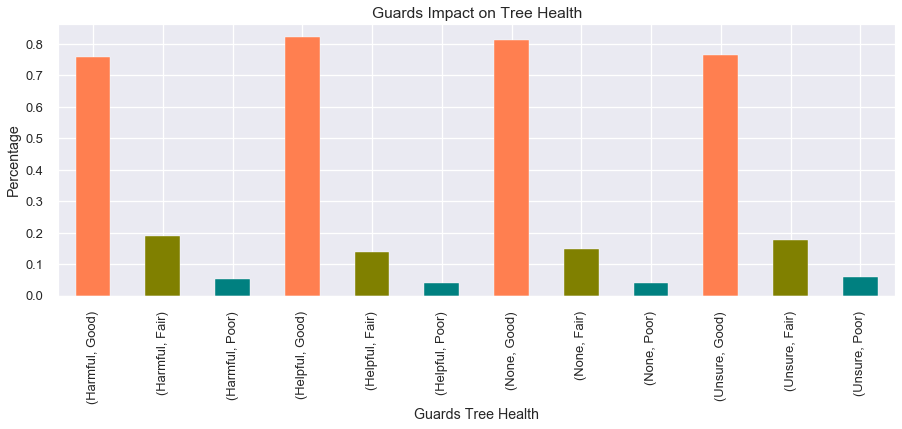

In [35]:
plt.figure(figsize=(15, 5))
tree.groupby('guards')['health'].value_counts(normalize=True).plot(kind='bar', color=['coral', 'olive', 'teal'])
plt.xlabel('Guards Tree Health')
plt.ylabel('Percentage')
plt.title('Guards Impact on Tree Health')
plt.show()

## Sidewalks Impact on Tree Health

Sidewalks are described as 'whether one of the sidewalk flags immediately adjacent to the tree was damaged, cracked, or lifted.'

In [36]:
tree_sidewalk = tree.sidewalk.value_counts().reset_index()
tree_sidewalk.columns = ['Sidewalk', 'Count']
tree_sidewalk

Sidewalk   Count
0  NoDamage  464516
1    Damage  187019

In [37]:
round(tree.sidewalk.value_counts(normalize=True), 4) * 100

# percentage of trees based on sidewalk condition

NoDamage    71.3
Damage      28.7
Name: sidewalk, dtype: float64

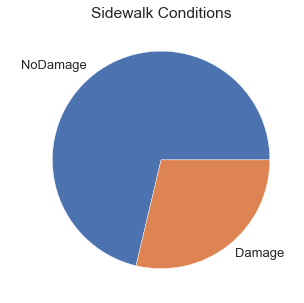

In [38]:
tree.sidewalk.value_counts(normalize=True).index = ['No Damage', 'Damage']
tree.sidewalk.value_counts(normalize=True).plot.pie(y='Percentage', figsize=(5, 5), legend=False).set_ylabel(' ')
plt.title('Sidewalk Conditions')
plt.show()

In [39]:
# tree.groupby('sidewalk')['health'].value_counts()

pd.crosstab(tree.health, [tree.sidewalk])

sidewalk  Damage  NoDamage
health                    
Fair       28676     67751
Good      151750    376577
Poor        6593     20188

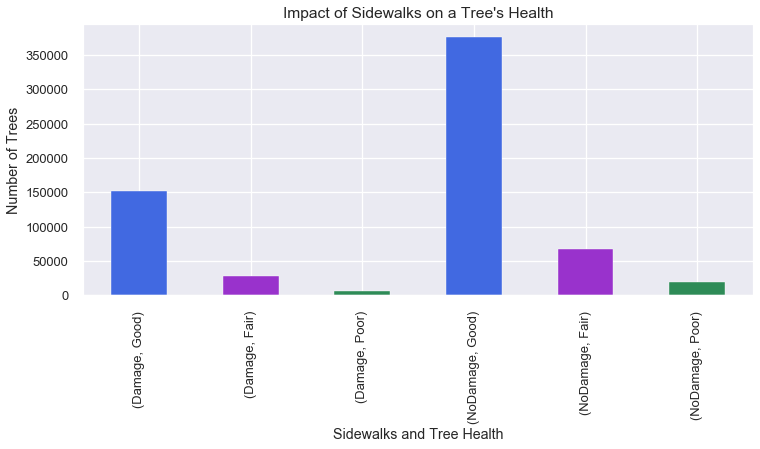

In [40]:
plt.figure(figsize=(12, 5))
tree.groupby('sidewalk')['health'].value_counts().plot(kind='bar', color=['royalblue', 'darkorchid', 'seagreen'])
plt.xlabel('Sidewalks and Tree Health')
plt.ylabel('Number of Trees')
plt.title('Impact of Sidewalks on a Tree\'s Health')
plt.show()

In [41]:
round(tree.groupby('sidewalk')['health'].value_counts(normalize=True), 4) * 100

# percentage of trees based on sidewalk conditions

sidewalk  health
Damage    Good      81.14
          Fair      15.33
          Poor       3.53
NoDamage  Good      81.07
          Fair      14.59
          Poor       4.35
Name: health, dtype: float64

Trees next to a damaged sidewalk have a modestly higher number of good trees, surprisingly. The damage to the sidewalk may be from the tree's roots protruding through the concrete! Poor trees are more frequently found next to sidewalks with no damage while fair trees are more likely to be found next to damaged sidewalks. Since there is always a lot of construction going on in NYC, could it be possible that trees are damaged during the replacement of sidewalks?

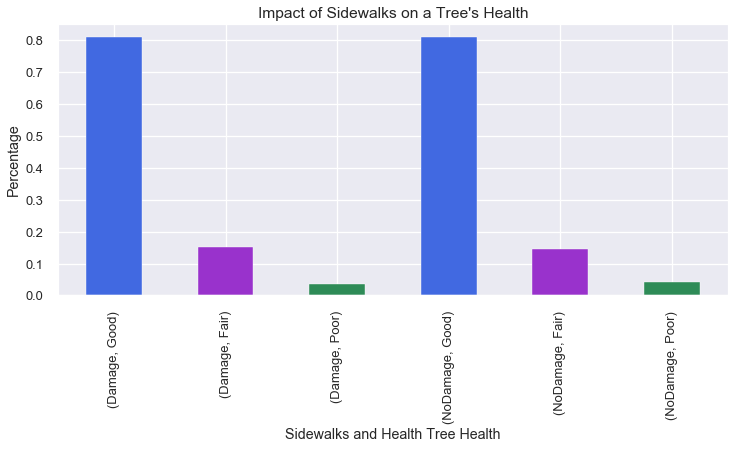

In [42]:
plt.figure(figsize=(12, 5))
tree.groupby('sidewalk')['health'].value_counts(normalize=True).plot(kind='bar', color=['royalblue', 'darkorchid', 'seagreen'])
plt.xlabel('Sidewalks and Health Tree Health')
plt.ylabel('Percentage')
plt.title('Impact of Sidewalks on a Tree\'s Health')
plt.show()

## Curb Location of Tree Beds

This is the 'location of tree bed in relationship to the curb; trees are either along the curb (OnCurb) or offset from the curb (OffsetFromCurb).'

In [43]:
tree_curbs = tree.curb_loc.value_counts().reset_index()
tree_curbs.columns = ['Curb', 'Count']
tree_curbs

Curb   Count
0          OnCurb  625736
1  OffsetFromCurb   25799

In [44]:
round(tree.curb_loc.value_counts(normalize=True), 4) * 100

# percentage of trees based on curb location

OnCurb            96.04
OffsetFromCurb     3.96
Name: curb_loc, dtype: float64

Almost all trees are located along the curb in the city!

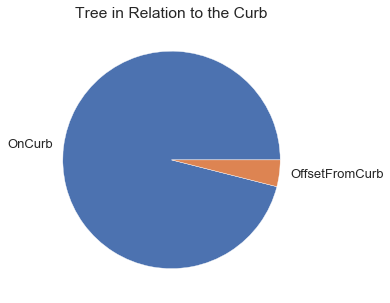

In [45]:
tree.curb_loc.value_counts(normalize=True).index = ['On Curb', 'Offset From Curb']
tree.curb_loc.value_counts(normalize=True).plot.pie(y='Percentage', figsize=(5, 5), legend=False).set_ylabel(' ')
plt.title('Tree in Relation to the Curb')
plt.show()

In [46]:
# tree.groupby('curb_loc')['health'].value_counts()

pd.crosstab(tree.health, [tree.curb_loc])

curb_loc  OffsetFromCurb  OnCurb
health                          
Fair                4022   92405
Good               20814  507513
Poor                 963   25818

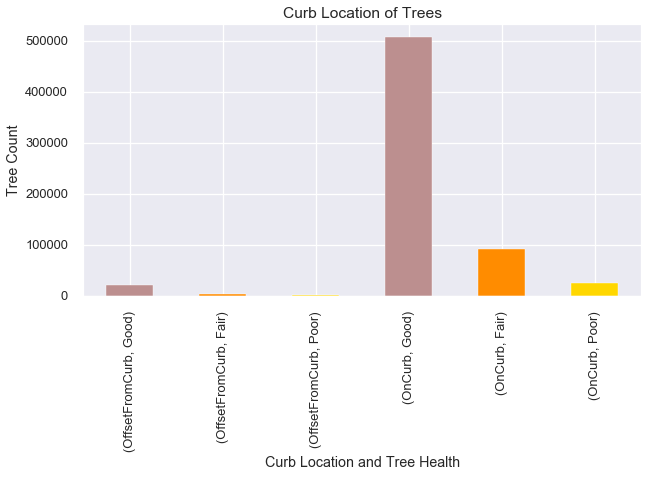

In [47]:
plt.figure(figsize=(10, 5))
tree.groupby('curb_loc')['health'].value_counts().plot(kind='bar', color=['rosybrown', 'darkorange', 'gold'])
plt.xlabel('Curb Location and Tree Health')
plt.ylabel('Tree Count')
plt.title('Curb Location of Trees')
plt.show()

In [48]:
round(tree.groupby('curb_loc')['health'].value_counts(normalize=True), 4) * 100

# percentage of trees based on location from curb

curb_loc        health
OffsetFromCurb  Good      80.68
                Fair      15.59
                Poor       3.73
OnCurb          Good      81.11
                Fair      14.77
                Poor       4.13
Name: health, dtype: float64

Trees located on the curb have higher good and poor tree numbers. Fair trees are more likely to be offset from the curb, but this is only marginally.

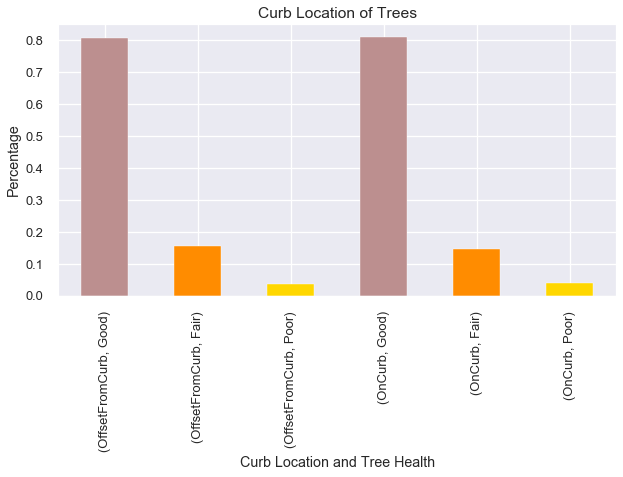

In [49]:
plt.figure(figsize=(10, 5))
tree.groupby('curb_loc')['health'].value_counts(normalize=True).plot(kind='bar', color=['rosybrown', 'darkorange', 'gold'])
plt.xlabel('Curb Location and Tree Health')
plt.ylabel('Percentage')
plt.title('Curb Location of Trees')
plt.show()

## Tree Diameter Distribution

In [50]:
round(tree[['health', 'tree_dbh']].groupby('health', as_index=False).mean(), 2)

health  tree_dbh
0   Fair     10.95
1   Good     11.94
2   Poor      8.99

The healthiest trees, labeled 'good', have the largest diameters while the 'poor' trees have the smallest diameters, on average.

In [51]:
# for good measure, let's see if the same is true if we take the median instead of the mean

tree[['health', 'tree_dbh']].groupby('health', as_index=False).median()

health  tree_dbh
0   Fair         9
1   Good        10
2   Poor         7

In [52]:
# distribution of diameters

tree.groupby('health')['tree_dbh'].describe()

count       mean      std  min  25%   50%   75%   max
health                                                          
Fair     96427.0  10.954370  7.61766  1.0  5.0   9.0  15.0  50.0
Good    528327.0  11.942466  8.53741  1.0  5.0  10.0  17.0  50.0
Poor     26781.0   8.985064  6.74574  1.0  4.0   7.0  12.0  50.0

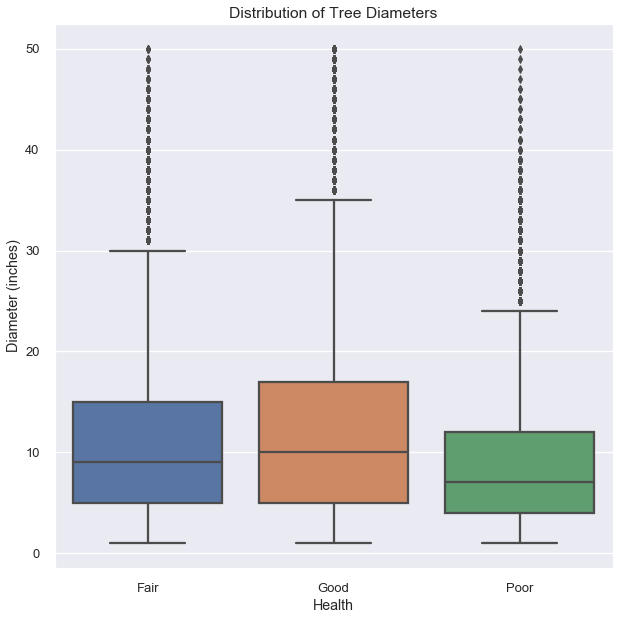

In [53]:
diadata = tree[['health', 'tree_dbh']]

plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='health', y='tree_dbh', data=diadata)
ax.set_xlabel('Health')
ax.set_ylabel('Diameter (inches)')
ax.set_title('Distribution of Tree Diameters')
plt.show()

We see here that good trees have highest average diameter followed by fair trees while poor trees have the smallest average diameter. This is understandable since trees in poor health are lacking the nutrients and stable environments that they need in order to grow and expand each year. Good trees have bigger diameters at the 75% percentile than fair and poor trees though at the 25% percentile, they are nearly equal to fair trees. Poor trees have smaller trees compared to fair and good trees at the 25% percentile, but only slightly. The difference is very noticeable at the 75% percentile. Each health class also contains a good number of outliers since there are poor trees with a 50 inch diameter, just like the fair and good trees.

## What Kinds of Trees Are Grown in the City?

In [54]:
tree.spc_common.unique() # take a look at all the different trees grown in NYC

array(['red maple', 'pin oak', 'honeylocust', 'American linden',
       'London planetree', 'ginkgo', 'willow oak', 'sycamore maple',
       'Amur maple', 'hedge maple', 'American elm', 'ash', 'crab apple',
       'silver maple', 'Turkish hazelnut', 'black cherry',
       'eastern redcedar', 'Norway maple', 'tulip-poplar', 'sawtooth oak',
       'swamp white oak', 'Sophora', 'Chinese fringetree',
       'southern magnolia', 'sweetgum', 'Callery pear', 'scarlet oak',
       'Atlantic white cedar', 'black oak', 'Japanese zelkova',
       'white oak', 'Ohio buckeye', 'northern red oak', 'silver linden',
       'pignut hickory', 'Kentucky yellowwood', 'mulberry', 'Douglas-fir',
       'crepe myrtle', 'sassafras', 'cherry', 'spruce', 'Chinese elm',
       'horse chestnut', 'holly', 'littleleaf linden', 'white pine',
       'blackgum', 'Japanese tree lilac', 'hardy rubber tree',
       'green ash', 'English oak', 'white ash', 'golden raintree',
       "Schumard's oak", 'Siberian elm', 'black

In [55]:
print('Number of unique trees grown in the city:', tree.spc_common.nunique())

Number of unique trees grown in the city: 132


Let's see which trees are the most popular.

In [56]:
tree.spc_common.value_counts().head(20) # show top 20

London planetree     86924
honeylocust          64239
Callery pear         58888
pin oak              53129
Norway maple         34176
littleleaf linden    29726
Japanese zelkova     29248
cherry               29244
ginkgo               21010
Sophora              19332
red maple            17241
green ash            16244
American linden      13524
silver maple         12223
sweetgum             10649
northern red oak      8367
silver linden         7993
American elm          7963
maple                 7067
purple-leaf plum      6873
Name: spc_common, dtype: int64

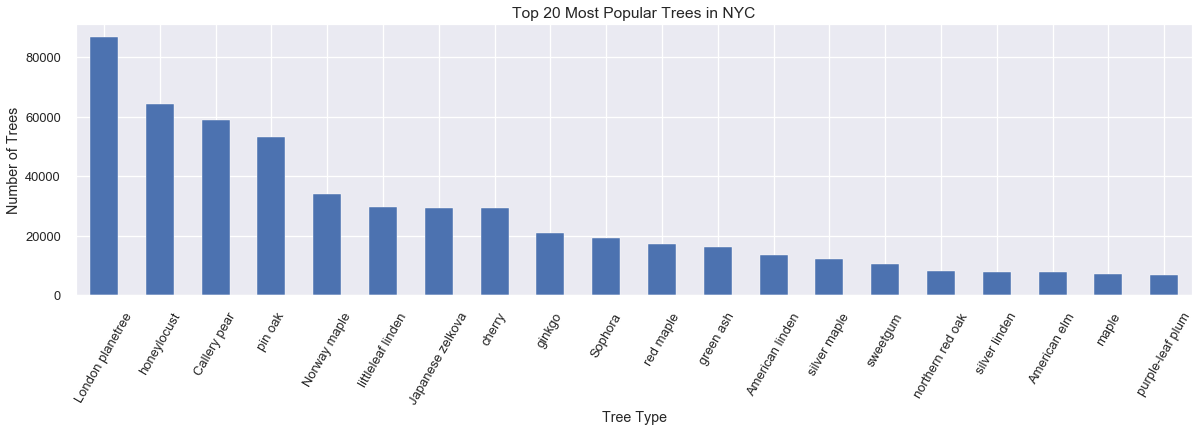

In [57]:
plt.figure(figsize=(20, 5))

tree.spc_common.value_counts().head(20).plot(kind='bar', title='Top 20 Most Popular Trees in NYC')
plt.xticks(rotation=60)
plt.xlabel('Tree Type')
plt.ylabel('Number of Trees')
plt.show()

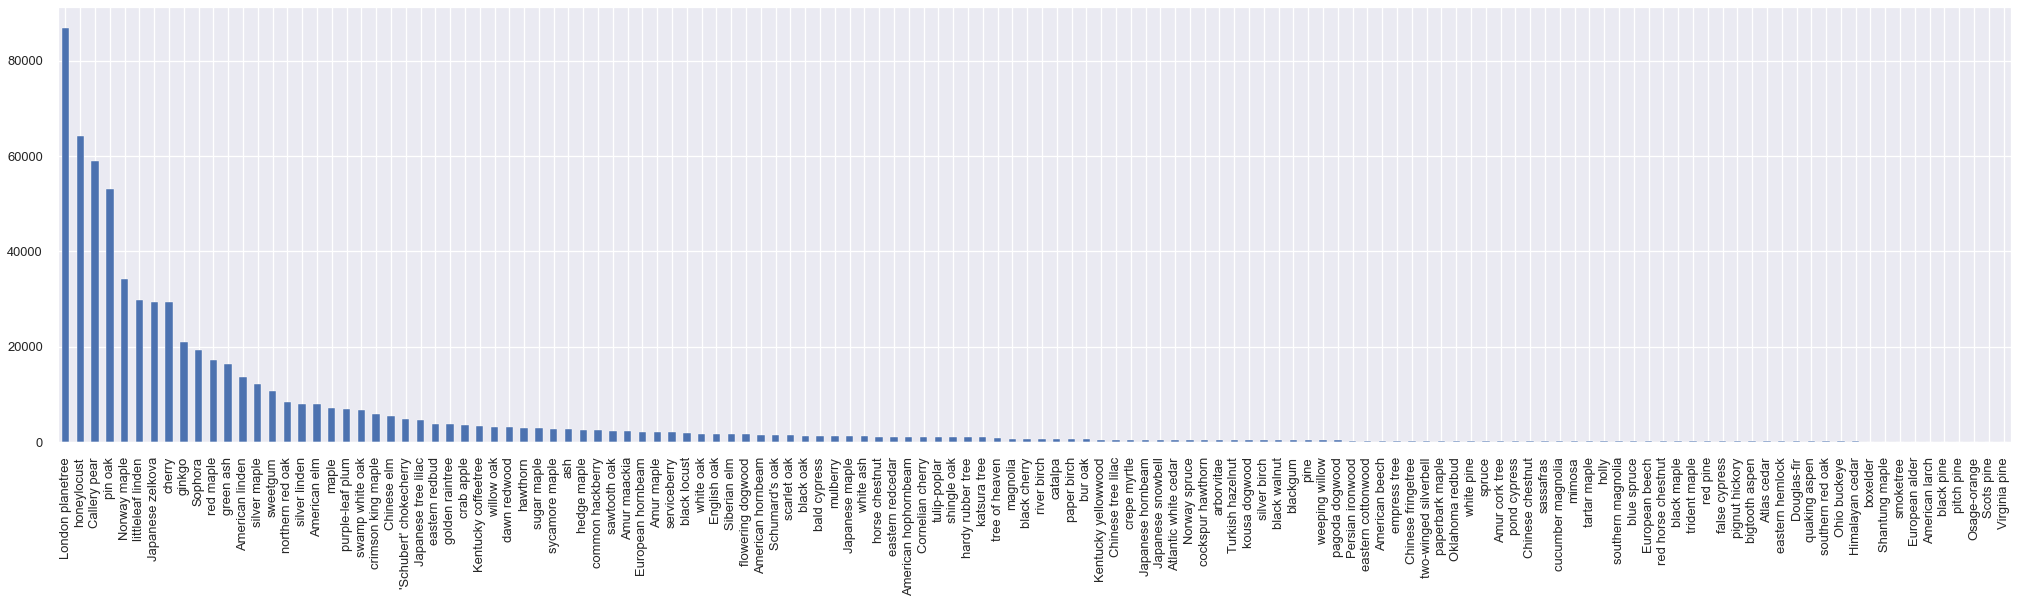

In [58]:
tree.spc_common.value_counts().plot(kind='bar', figsize=(35, 8))
plt.show()

## What Are the Most Popular Trees Grown in Each Borough?

### Bronx

In [59]:
tree_type_bronx = tree[tree.borough == 'Bronx']['spc_common'].value_counts().head(10).reset_index()
tree_type_bronx.columns = ['Tree', 'Count']
tree_type_bronx

Tree  Count
0        honeylocust   9685
1   London planetree   7507
2            pin oak   6440
3       Callery pear   4942
4   Japanese zelkova   4636
5             cherry   4084
6  littleleaf linden   3915
7       Norway maple   3374
8             ginkgo   2682
9            Sophora   2555

### Brooklyn

In [60]:
tree_type_brooklyn = tree[tree.borough == 'Brooklyn']['spc_common'].value_counts().head(10).reset_index()
tree_type_brooklyn.columns = ['Tree', 'Count']
tree_type_brooklyn

Tree  Count
0   London planetree  34860
1        honeylocust  16916
2            pin oak  12339
3   Japanese zelkova   9656
4       Callery pear   9077
5  littleleaf linden   8896
6       Norway maple   6988
7            Sophora   5987
8             cherry   5700
9             ginkgo   5589

### Manhattan

In [61]:
tree_type_manhattan = tree[tree.borough == 'Manhattan']['spc_common'].value_counts().head(10).reset_index()
tree_type_manhattan.columns = ['Tree', 'Count']
tree_type_manhattan

Tree  Count
0        honeylocust  13168
1       Callery pear   7295
2             ginkgo   5858
3            pin oak   4583
4            Sophora   4453
5   London planetree   4122
6   Japanese zelkova   3596
7  littleleaf linden   3331
8       American elm   1696
9    American linden   1583

### Queens

In [62]:
tree_type_queens = tree[tree.borough == 'Queens']['spc_common'].value_counts().head(10).reset_index()
tree_type_queens.columns = ['Tree', 'Count']
tree_type_queens

Tree  Count
0   London planetree  31076
1            pin oak  22575
2        honeylocust  20285
3       Norway maple  19400
4       Callery pear  16539
5             cherry  13485
6  littleleaf linden  11899
7   Japanese zelkova   8982
8          green ash   7388
9       silver maple   6080

### Staten Island

In [63]:
tree_type_staten = tree[tree.borough == 'Staten Island']['spc_common'].value_counts().head(10).reset_index()
tree_type_staten.columns = ['Tree', 'Count']
tree_type_staten

Tree  Count
0      Callery pear  21035
1  London planetree   9359
2         red maple   7369
3           pin oak   7192
4            cherry   5107
5          sweetgum   5003
6       honeylocust   4185
7      Norway maple   4124
8      silver maple   4039
9             maple   2609

## What Kinds of Problems Do the Trees Have?

In [64]:
tree_problems = tree.problems # locate overall problems

In [65]:
tree_problems.sample(10)

58066           None
141075          None
379034          None
601819          None
635824          None
347214          None
523556          None
528061          None
649993    TrunkOther
632905        Stones
Name: problems, dtype: object

In [66]:
problems = [] # append values to a list, split items like 'Stones,BranchOther' into 'Stones', 'BranchOther'

for item in tree_problems:
    if ',' in item:
        split_str = item.split(',')
        problems.append(split_str)
    else:
        problems.append(item)

In [67]:
flat_problems = [] # separate the strings in the list of lists and combine them all into one list

for x in range(len(problems)):
    if isinstance(problems[x], list) == True:
        for subitem in problems[x]:
            flat_problems.append(subitem)
    else:
        flat_problems.append(problems[x])

In [68]:
series_problems = pd.Series(flat_problems) # display occurences of each problem

series_problems.value_counts()

None            425892
Stones          139862
BranchLights     62313
TrunkOther       32546
RootOther        30291
BranchOther      24339
WiresRope        13255
MetalGrates       3535
TrunkLights       1031
Sneakers           409
dtype: int64

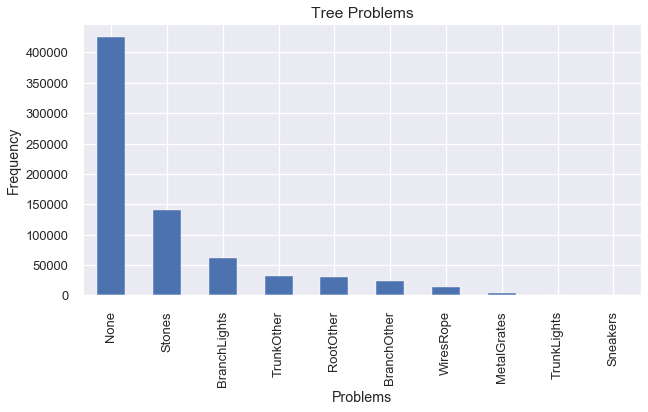

In [69]:
series_problems.value_counts().plot(kind='bar', title='Tree Problems', figsize=(10, 5))
plt.xlabel('Problems')
plt.ylabel('Frequency')
plt.show()

The majority of trees do not have any problems, which is understandable since most trees are in good health.

## Does the Number of Problems Increase as the Health of a Tree Decreases?

In [70]:
# count how many problems a tree has
# find the correlation between the number of problems and the health of the tree

# create a new column that states how many problems a tree has

num_of_problems = [] # list of number of tree problems

for x in range(len(problems)):
    if isinstance(problems[x], list) == True: # multiple tree problems are stored in a list
        num_of_problems.append(len(problems[x]))
    if problems[x] == 'None':
        num_of_problems.append(0)
    if (problems[x] != 'None') and (isinstance(problems[x], list) != True): # singluar problem, listed as a string
        num_of_problems.append(1)

In [71]:
# create a new column and set its values equal to the corresponding num_of_problems list

tree['num_problems'] = num_of_problems

In [72]:
# sample new dataset

tree.sample(5)

tree_id  tree_dbh curb_loc health        spc_common steward   guards  \
185955   406026         5   OnCurb   Good  London planetree    None     None   
648515   200742        14   OnCurb   Good       honeylocust    None     None   
567580    33176         4   OnCurb   Good            cherry    None     None   
483754   582202        10   OnCurb   Good      bald cypress    1or2  Helpful   
350758   582172        14   OnCurb   Good     silver linden    None     None   

        sidewalk problems root_stone  ... trunk_wire trnk_light trnk_other  \
185955  NoDamage     None         No  ...         No         No         No   
648515  NoDamage   Stones        Yes  ...         No         No         No   
567580  NoDamage     None         No  ...         No         No         No   
483754    Damage     None         No  ...         No         No         No   
350758  NoDamage     None         No  ...         No         No         No   

       brch_light brch_shoe brch_other   borough  longitude   latitude  \
185955         No        No         No     Bronx -73.849698  40.824732   
648515         No        No         No    Queens -73.929089  40.762612   
567580         No        No         No  Brooklyn -73.940575  40.724592   
483754         No        No         No  Brooklyn -73.957208  40.685501   
350758         No        No         No    Queens -73.820937  40.785750   

        num_problems  
185955             0  
648515             1  
567580             0  
483754             0  
350758             0  

[5 rows x 22 columns]

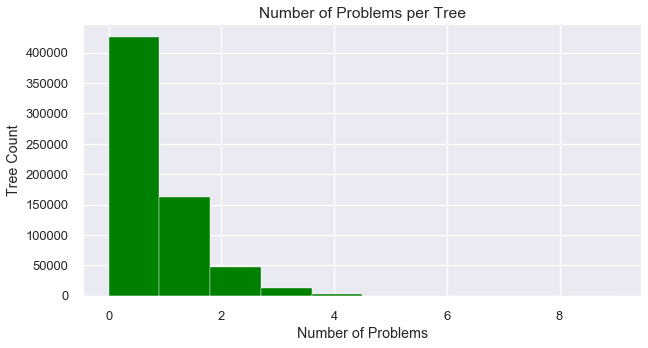

In [73]:
tree.num_problems.plot(kind='hist', color='green', figsize=(10, 5)) # plot the number of problems a tree has
plt.title('Number of Problems per Tree')
plt.xlabel('Number of Problems')
plt.ylabel('Tree Count')
plt.show()

In [74]:
tree[['num_problems']].describe()

num_problems
count  651535.000000
mean        0.472087
std         0.754487
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         9.000000

Since the majority of trees have 0 problems, we want to view the statistics of trees with at least one problem.

In [75]:
prob_one_more = tree[tree.num_problems > 0] # filter for trees with at least 1 problem

prob_one_more[['num_problems']].describe()

num_problems
count  225643.000000
mean        1.363131
std         0.655040
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000

The majority of trees have one problem until around the 75th percentile, which shows 2 problems per tree. The most problematic trees have 9 problems!

In [76]:
# distribution of number of problems by tree health

tree.groupby('health')['num_problems'].describe()

count      mean       std  min  25%  50%  75%  max
health                                                       
Fair     96427.0  0.643658  0.872558  0.0  0.0  0.0  1.0  7.0
Good    528327.0  0.430014  0.710553  0.0  0.0  0.0  1.0  7.0
Poor     26781.0  0.684328  0.980530  0.0  0.0  0.0  1.0  9.0

In [77]:
# distribution of trees with at least one problem

prob_one_more.groupby('health')['num_problems'].describe()

count      mean       std  min  25%  50%  75%  max
health                                                       
Fair     42512.0  1.459964  0.731541  1.0  1.0  1.0  2.0  7.0
Good    171836.0  1.322121  0.610611  1.0  1.0  1.0  2.0  7.0
Poor     11295.0  1.622576  0.870184  1.0  1.0  1.0  2.0  9.0

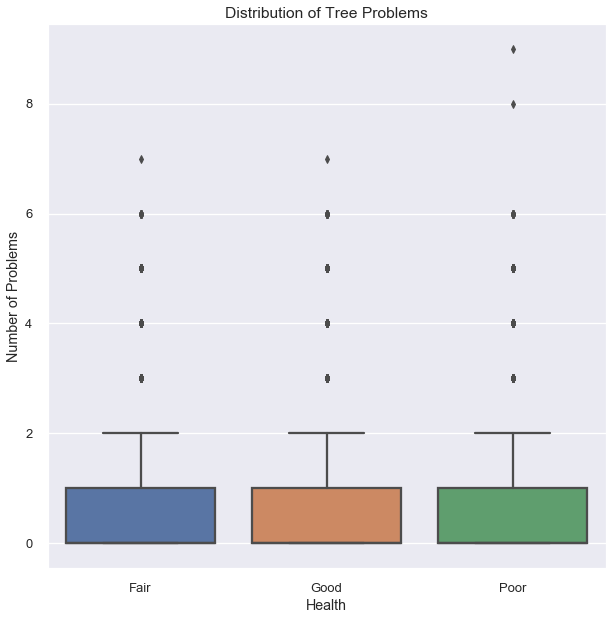

In [78]:
# boxplot view

boxdata = tree[['health', 'num_problems']]

plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='health', y='num_problems', data=boxdata)
ax.set_xlabel('Health')
ax.set_ylabel('Number of Problems')
ax.set_title('Distribution of Tree Problems')
plt.show()

In [79]:
# most common types of good trees

tree[tree.health == 'Good'].spc_common.value_counts().head(10)

London planetree     73224
honeylocust          54483
Callery pear         48035
pin oak              45513
Japanese zelkova     25277
cherry               24494
littleleaf linden    23573
Norway maple         21240
ginkgo               17113
Sophora              15827
Name: spc_common, dtype: int64

In [80]:
# most common types of fair trees

tree[tree.health == 'Fair'].spc_common.value_counts().head(10)

London planetree     11504
Norway maple          9159
Callery pear          8767
honeylocust           8568
pin oak               6383
littleleaf linden     4438
cherry                3446
Japanese zelkova      3189
red maple             2911
Sophora               2889
Name: spc_common, dtype: int64

In [81]:
# most common types of poor trees

tree[tree.health == 'Poor'].spc_common.value_counts().head(10)

Norway maple         3777
London planetree     2196
Callery pear         2086
littleleaf linden    1715
cherry               1304
pin oak              1233
honeylocust          1188
ginkgo               1118
red maple             896
Japanese zelkova      782
Name: spc_common, dtype: int64

## Locating Trees in NYC

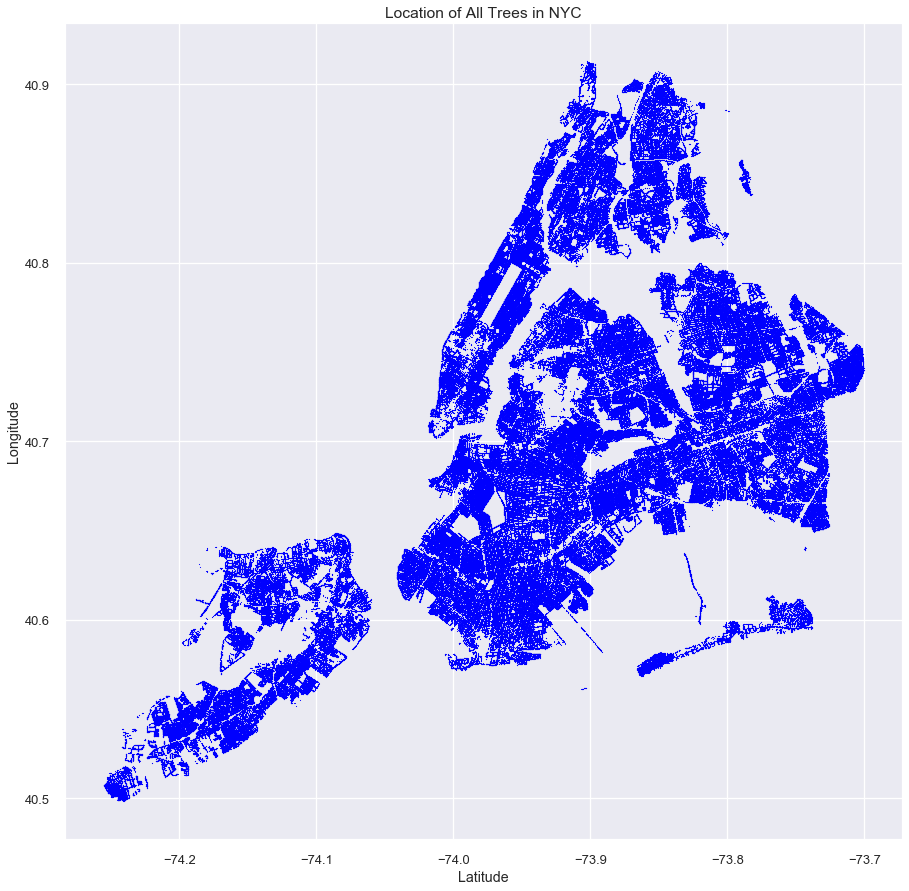

In [82]:
plt.figure(figsize=(15, 15))
plt.scatter(tree.longitude, tree.latitude, c='blue', marker='.', s=2)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Location of All Trees in NYC')
plt.show()

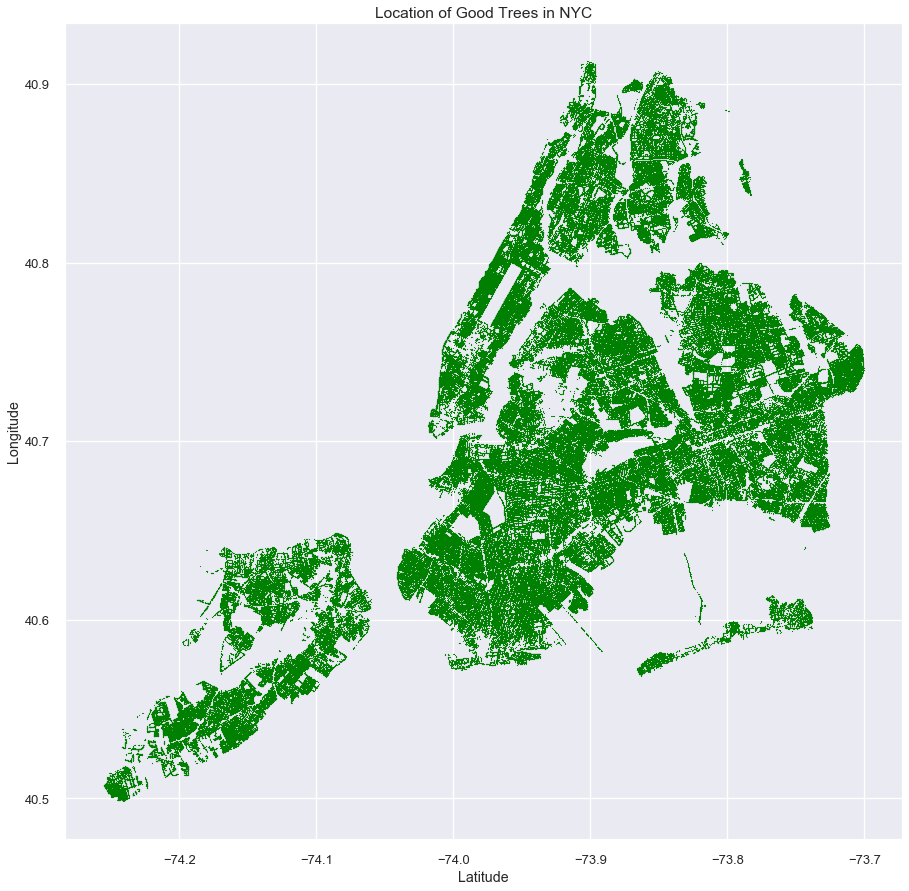

In [83]:
good_trees = tree[tree.health == 'Good'][['longitude', 'latitude']]
fair_trees = tree[tree.health == 'Fair'][['longitude', 'latitude']]
poor_trees = tree[tree.health == 'Poor'][['longitude', 'latitude']]

plt.figure(figsize=(15, 15))
plt.scatter(good_trees.longitude, good_trees.latitude, c='green', marker='.', s=2)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Location of Good Trees in NYC')
plt.show()

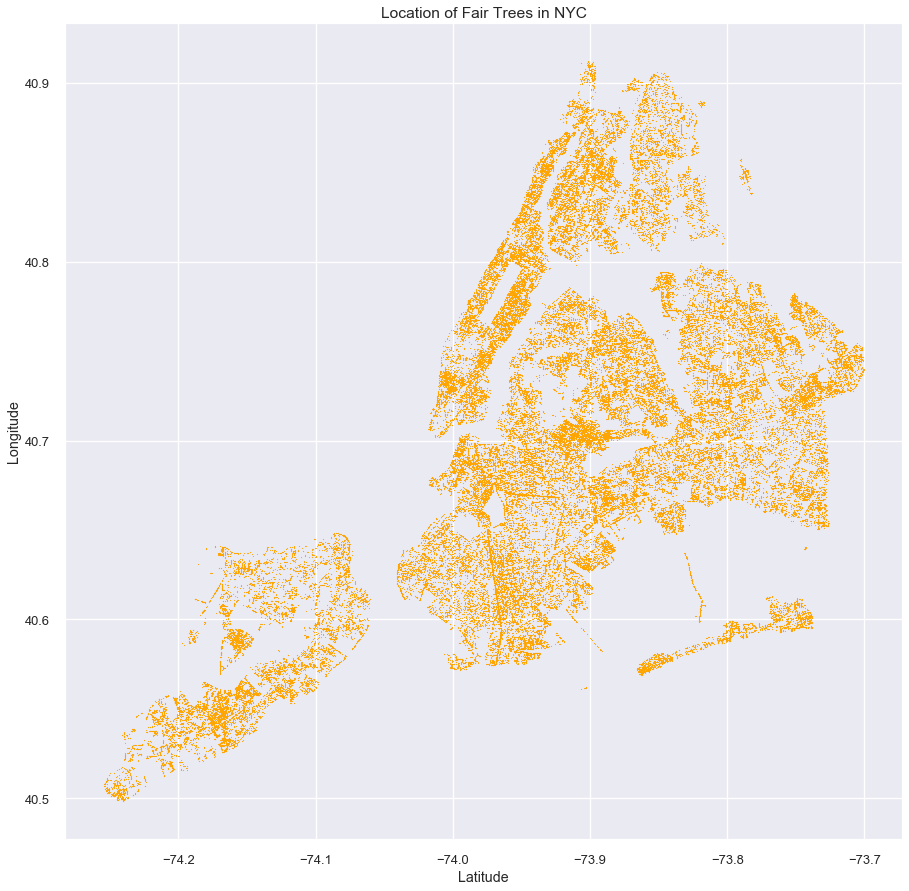

In [84]:
plt.figure(figsize=(15, 15))
plt.scatter(fair_trees.longitude, fair_trees.latitude, c='orange', marker='.', s=2)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Location of Fair Trees in NYC')
plt.show()

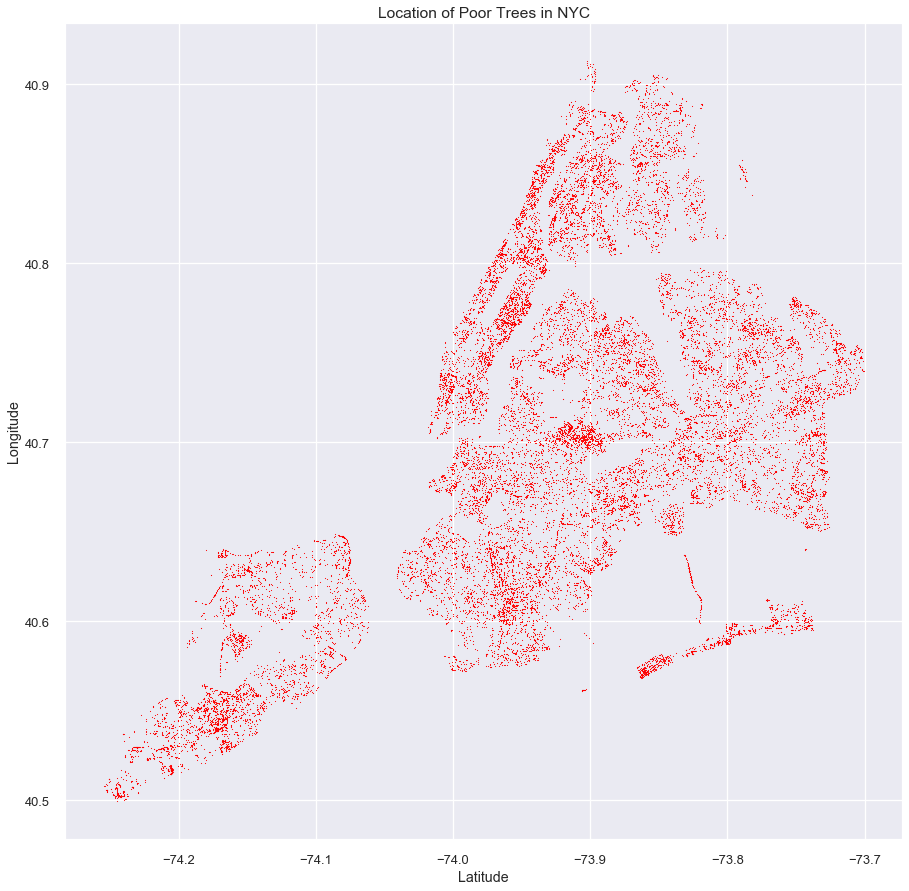

In [85]:
plt.figure(figsize=(15, 15))
plt.scatter(poor_trees.longitude, poor_trees.latitude, c='red', marker='.', s=2)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Location of Poor Trees in NYC')
plt.show()

## Do Root Problems Affect the Health of Trees?

There are three types of root problems for trees: 
- root_stone - Indicates the presence of a root problem caused by paving stones in tree bed
- root_grate - Indicates the presence of a root problem caused by metal grates in tree bed
- root_other - Indicates the presence of other root problems	

In [86]:
tree_root_stone = tree.root_stone.value_counts().reset_index()
tree_root_stone.columns = ['Stone', 'Count']
tree_root_stone

Stone   Count
0    No  511673
1   Yes  139862

In [87]:
# tree.groupby('health').root_stone.value_counts()

pd.crosstab(tree.health, [tree.root_stone])

root_stone      No     Yes
health                    
Fair         72946   23481
Good        417128  111199
Poor         21599    5182

In [88]:
round(tree.groupby('root_stone')['health'].value_counts(normalize=True), 4) * 100

# percentage of trees with root stones based on health

root_stone  health
No          Good      81.52
            Fair      14.26
            Poor       4.22
Yes         Good      79.51
            Fair      16.79
            Poor       3.71
Name: health, dtype: float64

In [89]:
tree_root_grate = tree.root_grate.value_counts().reset_index()
tree_root_grate.columns = ['Grate', 'Count']
tree_root_grate

Grate   Count
0    No  648000
1   Yes    3535

In [90]:
# tree.groupby('health').root_grate.value_counts()

pd.crosstab(tree.health, [tree.root_grate])

root_grate      No   Yes
health                  
Fair         95575   852
Good        525898  2429
Poor         26527   254

In [91]:
round(tree.groupby('root_grate')['health'].value_counts(normalize=True), 4) * 100

# percentage of trees based with root grate based on health

root_grate  health
No          Good      81.16
            Fair      14.75
            Poor       4.09
Yes         Good      68.71
            Fair      24.10
            Poor       7.19
Name: health, dtype: float64

In [92]:
tree_root_other = tree.root_other.value_counts().reset_index()
tree_root_other.columns = ['Other', 'Count']
tree_root_other

Other   Count
0    No  621244
1   Yes   30291

In [93]:
# tree.groupby('health').root_other.value_counts()

pd.crosstab(tree.health, [tree.root_other])

root_other      No    Yes
health                   
Fair         89941   6486
Good        506637  21690
Poor         24666   2115

In [94]:
round(tree.groupby('root_other')['health'].value_counts(normalize=True), 4) * 100

# percentage of trees with other root problems based on health

root_other  health
No          Good      81.55
            Fair      14.48
            Poor       3.97
Yes         Good      71.61
            Fair      21.41
            Poor       6.98
Name: health, dtype: float64

In [95]:
pd.crosstab(tree.health, [tree.root_stone, tree.root_grate, tree.root_other])

root_stone      No                       Yes               
root_grate      No          Yes           No        Yes    
root_other      No    Yes    No  Yes      No   Yes   No Yes
health                                                     
Fair         67650   4553   654   89   21549  1823   88  21
Good        400529  14455  1956  188  103914  7000  238  47
Poor         19777   1600   185   37    4679   471   25   7

## Do Trunk Problems Affect the Health of a Tree?

There are three problems encountered by trees:
- trunk_wire - Indicates the presence of a trunk problem caused by wires or rope wrapped around the trunl
- trnk_light - Indicates the presence of a trunk problem caused by lighting installed on the tree
- trnk_other - Indicates the presence of other trunk problems	

In [96]:
tree_trunk_wire = tree.trunk_wire.value_counts().reset_index()
tree_trunk_wire.columns = ['Trunk Wire', 'Count']
tree_trunk_wire

Trunk Wire   Count
0         No  638280
1        Yes   13255

In [97]:
# tree.groupby('health').trunk_wire.value_counts()

pd.crosstab(tree.health, [tree.trunk_wire])

trunk_wire      No   Yes
health                  
Fair         93663  2764
Good        518587  9740
Poor         26030   751

In [98]:
round(tree.groupby('trunk_wire')['health'].value_counts(normalize=True), 4) * 100

# percentage of trees with trunk wire problems based on health

trunk_wire  health
No          Good      81.25
            Fair      14.67
            Poor       4.08
Yes         Good      73.48
            Fair      20.85
            Poor       5.67
Name: health, dtype: float64

In [99]:
tree_trunk_light = tree.trnk_light.value_counts().reset_index()
tree_trunk_light.columns = ['Light', 'Count']
tree_trunk_light

Light   Count
0    No  650504
1   Yes    1031

In [100]:
# tree.groupby('health').trnk_light.value_counts()

pd.crosstab(tree.health, [tree.trnk_light])

trnk_light      No  Yes
health                 
Fair         96211  216
Good        527573  754
Poor         26720   61

In [101]:
round(tree.groupby('trnk_light')['health'].value_counts(normalize=True), 4) * 100

# percentage of trees with trunk light problems based on health

trnk_light  health
No          Good      81.10
            Fair      14.79
            Poor       4.11
Yes         Good      73.13
            Fair      20.95
            Poor       5.92
Name: health, dtype: float64

In [102]:
tree_trunk_other = tree.trnk_other.value_counts().reset_index()
tree_trunk_other.columns = ['Other', 'Count']
tree_trunk_other

Other   Count
0    No  618989
1   Yes   32546

In [103]:
# tree.groupby('health').trnk_other.value_counts()

pd.crosstab(tree.health, [tree.trnk_other])

trnk_other      No    Yes
health                   
Fair         87054   9373
Good        509068  19259
Poor         22867   3914

In [104]:
round(tree.groupby('trnk_other')['health'].value_counts(normalize=True), 4) * 100

# percentage of trees with other trunk problems based on health

trnk_other  health
No          Good      82.24
            Fair      14.06
            Poor       3.69
Yes         Good      59.17
            Fair      28.80
            Poor      12.03
Name: health, dtype: float64

In [105]:
pd.crosstab(tree.health, [tree.trunk_wire, tree.trnk_light, tree.trnk_other])

trunk_wire      No                   Yes              
trnk_light      No         Yes        No       Yes    
trnk_other      No    Yes   No Yes    No  Yes   No Yes
health                                                
Fair         84613   8880  145  25  2256  462   40   6
Good        499549  18414  578  46  8829  781  112  18
Poor         22282   3706   37   5   536  196   12   7

## Do Branch Problems Affect the Health of a Tree?

There are three possible problems with a tree's branches:
- brch_light - Indicates the presence of a branch problem caused by lights (usually string lights) or wires in the branches
- brch_shoe - Indicates the presence of a branch problem caused by sneakers in the branches
- brch_other - Indicates the presence of other branch problems	

In [106]:
tree_branch_light = tree.brch_light.value_counts().reset_index()
tree_branch_light.columns = ['Light', 'Count']
tree_branch_light

Light   Count
0    No  589222
1   Yes   62313

In [107]:
# tree.groupby('health').brch_light.value_counts()

pd.crosstab(tree.health, [tree.brch_light])

brch_light      No    Yes
health                   
Fair         85509  10918
Good        479300  49027
Poor         24413   2368

In [108]:
round(tree.groupby('brch_light')['health'].value_counts(normalize=True), 4) * 100

# percentage of trees with branch light problems based on health

brch_light  health
No          Good      81.34
            Fair      14.51
            Poor       4.14
Yes         Good      78.68
            Fair      17.52
            Poor       3.80
Name: health, dtype: float64

In [109]:
tree_branch_shoe = tree.brch_shoe.value_counts().reset_index()
tree_branch_shoe.columns = ['Shoes', 'Count']
tree_branch_shoe

Shoes   Count
0    No  651126
1   Yes     409

In [110]:
# tree.groupby('health').brch_shoe.value_counts()

pd.crosstab(tree.health, [tree.brch_shoe])

brch_shoe      No  Yes
health                
Fair        96333   94
Good       528042  285
Poor        26751   30

In [111]:
round(tree.groupby('brch_shoe')['health'].value_counts(normalize=True), 4) * 100

# percentage of trees with branch shoe problems based on health

brch_shoe  health
No         Good      81.10
           Fair      14.79
           Poor       4.11
Yes        Good      69.68
           Fair      22.98
           Poor       7.33
Name: health, dtype: float64

In [112]:
tree_branch_other = tree.brch_other.value_counts().reset_index()
tree_branch_other.columns = ['Other', 'Count']
tree_branch_other

Other   Count
0    No  627196
1   Yes   24339

In [113]:
# tree.groupby('health').brch_other.value_counts()

pd.crosstab(tree.health, [tree.brch_other])

brch_other      No    Yes
health                   
Fair         88545   7882
Good        515522  12805
Poor         23129   3652

In [114]:
round(tree.groupby('brch_other')['health'].value_counts(normalize=True), 4) * 100

# percentage of trees with other branch problems based on health

brch_other  health
No          Good      82.19
            Fair      14.12
            Poor       3.69
Yes         Good      52.61
            Fair      32.38
            Poor      15.00
Name: health, dtype: float64

In [115]:
pd.crosstab(tree.health, [tree.brch_light, tree.brch_shoe, tree.brch_other])

brch_light      No                    Yes              
brch_shoe       No         Yes         No       Yes    
brch_other      No    Yes   No Yes     No   Yes  No Yes
health                                                 
Fair         78165   7270   59  15  10302   596  19   1
Good        467718  11355  200  27  47549  1420  55   3
Poor         21050   3339   20   4   2056   306   3   3

Let's isolate the problems to branch - other columns and locate any patterns.

In [116]:
tree_probs_spec = tree[['problems', 'root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other']]
tree_probs_spec.sample(10)

problems root_stone root_grate root_other trunk_wire trnk_light  \
275914          None         No         No         No         No         No   
323137          None         No         No         No         No         No   
262617        Stones        Yes         No         No         No         No   
56244           None         No         No         No         No         No   
289869          None         No         No         No         No         No   
469179        Stones        Yes         No         No         No         No   
423642          None         No         No         No         No         No   
172114          None         No         No         No         No         No   
567562  BranchLights         No         No         No         No         No   
587160          None         No         No         No         No         No   

       trnk_other brch_light brch_shoe brch_other  
275914         No         No        No         No  
323137         No         No        No         No  
262617         No         No        No         No  
56244          No         No        No         No  
289869         No         No        No         No  
469179         No         No        No         No  
423642         No         No        No         No  
172114         No         No        No         No  
567562         No        Yes        No         No  
587160         No         No        No         No

The columns root_stone, root_grate, root_other, trunk_wire, trnk_light, trnk_other, brch_light, brch_shoe, and brch_other indicate all the problems listed under the problems column. For example, if a tree (46803) has 'RootOther,WiresRope,TrunkLights' listed under problems, then the columns root_other, trunk_wire, and trnk_light show a Yes while the others show No.

In [117]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651535 entries, 0 to 651534
Data columns (total 22 columns):
tree_id         651535 non-null int64
tree_dbh        651535 non-null int64
curb_loc        651535 non-null object
health          651535 non-null object
spc_common      651535 non-null object
steward         651535 non-null object
guards          651535 non-null object
sidewalk        651535 non-null object
problems        651535 non-null object
root_stone      651535 non-null object
root_grate      651535 non-null object
root_other      651535 non-null object
trunk_wire      651535 non-null object
trnk_light      651535 non-null object
trnk_other      651535 non-null object
brch_light      651535 non-null object
brch_shoe       651535 non-null object
brch_other      651535 non-null object
borough         651535 non-null object
longitude       651535 non-null float64
latitude        651535 non-null float64
num_problems    651535 non-null int64
dtypes: float64(2), int64(3), ob

After analyzing and visualizing our dataset, we can form a hypothesis as to what constitutes a good tree, fair tree, and poor tree.

In [118]:
# save updated dataset to file

# tree.to_csv('tree_census_stat_ready.csv')